In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing Dataset


In [ ]:
general_data = pd.read_csv('/content/drive/MyDrive/hr analytics/general_data.csv')
employee_survey_data = pd.read_csv('/content/drive/MyDrive/hr analytics/employee_survey_data.csv')
manager_survey_data = pd.read_csv('/content/drive/MyDrive/hr analytics/manager_survey_data.csv')

#Preprocessing

##Cleaning the Data

###BEFORE

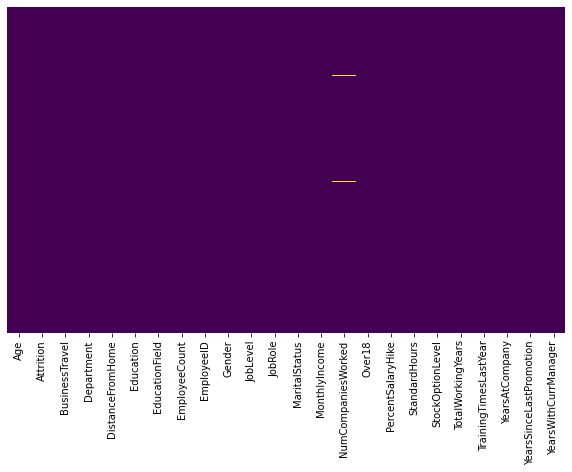

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(general_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

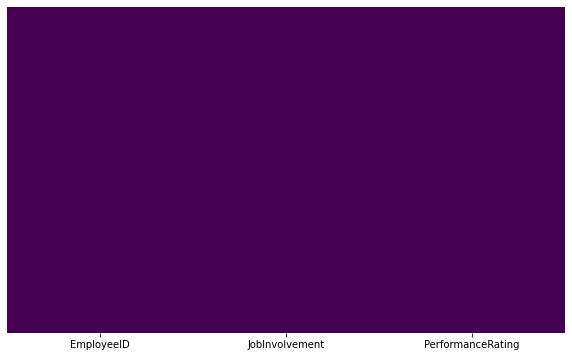

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(manager_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

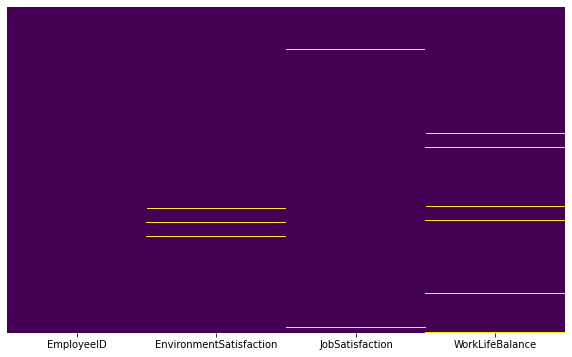

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(employee_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
general_data['NumCompaniesWorked'].fillna(value=general_data['NumCompaniesWorked'].mean(), inplace=True)
general_data['TotalWorkingYears'].fillna(value=general_data['TotalWorkingYears'].mean(), inplace=True)
employee_survey_data['EnvironmentSatisfaction'].fillna(value=employee_survey_data['EnvironmentSatisfaction'].mean(), inplace=True)
employee_survey_data['JobSatisfaction'].fillna(value=employee_survey_data['JobSatisfaction'].mean(), inplace=True)
employee_survey_data['WorkLifeBalance'].fillna(value=employee_survey_data['WorkLifeBalance'].mean(), inplace=True)

###AFTER

In [ ]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [ ]:
print(general_data.shape ,  employee_survey_data.shape ,  manager_survey_data.shape)
print(employee_survey_data.columns.tolist())
print(manager_survey_data.columns.tolist())

(4410, 24) (4410, 4) (4410, 3)
['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
['EmployeeID', 'JobInvolvement', 'PerformanceRating']


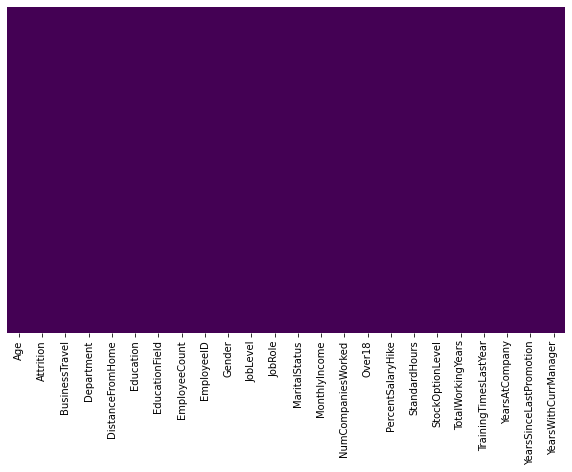

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(general_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

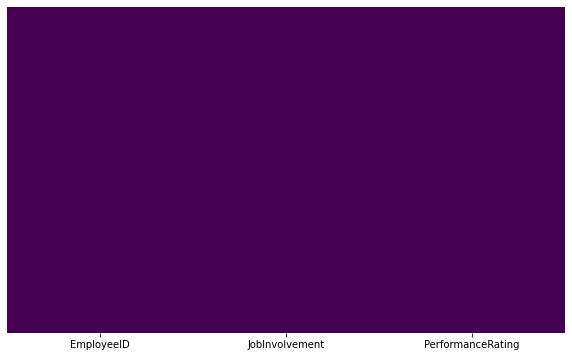

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(manager_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

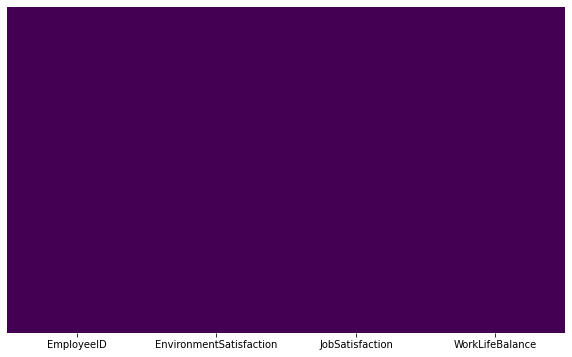

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(employee_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##Factorizing Categorical Variables

In [ ]:
general_data = pd.get_dummies(general_data,prefix=['Business'], columns = ['BusinessTravel'], drop_first=True)
general_data = pd.get_dummies(general_data,prefix=['Attrition'], columns = ['Attrition'], drop_first=True)
general_data = pd.get_dummies(general_data,prefix=['Department'], columns = ['Department'], drop_first=True)

In [ ]:
general_data.head()

,Age,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Business_Travel_Frequently,Business_Travel_Rarely,Attrition_Yes,Department_Research & Development,Department_Sales
0,51,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,0,1,0,0,1
1,31,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,1,0,1,1,0
2,32,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,1,0,0,1,0
3,38,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,0,0,0,1,0
4,32,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,0,1,0,1,0


MERGING THE THREE DATASETS

In [ ]:
merge = pd.merge(employee_survey_data, manager_survey_data, on='EmployeeID')
dataset = pd.merge(general_data, merge, on='EmployeeID')
dataset.head()

,Age,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Business_Travel_Frequently,Business_Travel_Rarely,Attrition_Yes,Department_Research & Development,Department_Sales,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,0,1,0,0,1,3.0,4.0,2.0,3,3
1,31,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,1,0,1,1,0,3.0,2.0,4.0,2,4
2,32,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,1,0,0,1,0,2.0,2.0,1.0,3,3
3,38,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,0,0,0,1,0,4.0,4.0,3.0,2,3
4,32,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,0,1,0,1,0,4.0,1.0,3.0,3,3


Exploring the data

Text(0.5, 0, 'Attrition')

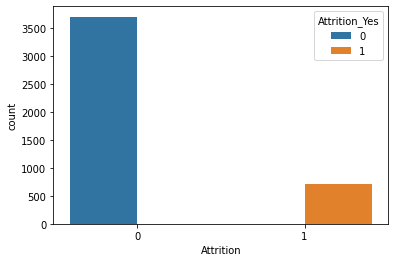

In [ ]:
sns.countplot(x = 'Attrition_Yes', data = dataset, hue = 'Attrition_Yes')
plt.xlabel('Attrition')

This signifies that around 500-1000 people left the company

UNIVARIATE DATA ANALYSIS

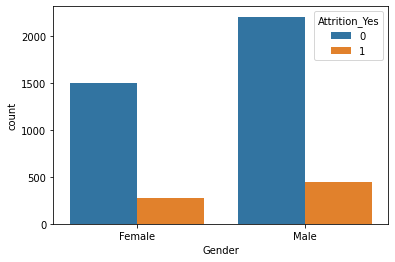

In [ ]:
sns.countplot(x = 'Gender', data = dataset, hue = 'Attrition_Yes')

The ratio of males and females who left the job is approximately the same. We can see here, gender is not an indicator itself. Our initial hypothesis here is that it is not about genders.

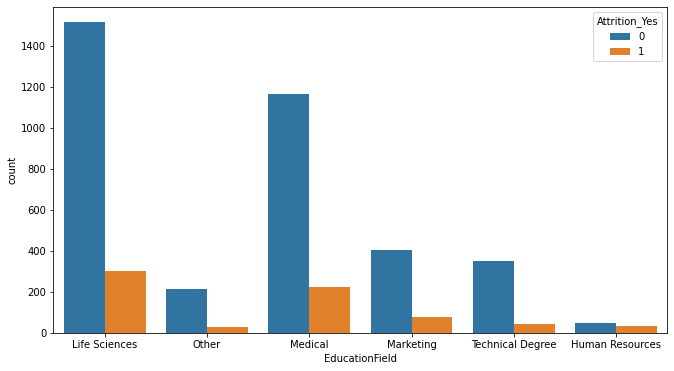

In [ ]:
a4_dims = (11, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = 'EducationField', data = dataset, hue = 'Attrition_Yes', ax=ax)

In [ ]:
#Resign Ratios by Education

Those with an degree in Human Resources are more likely to leave (ratio is very low).

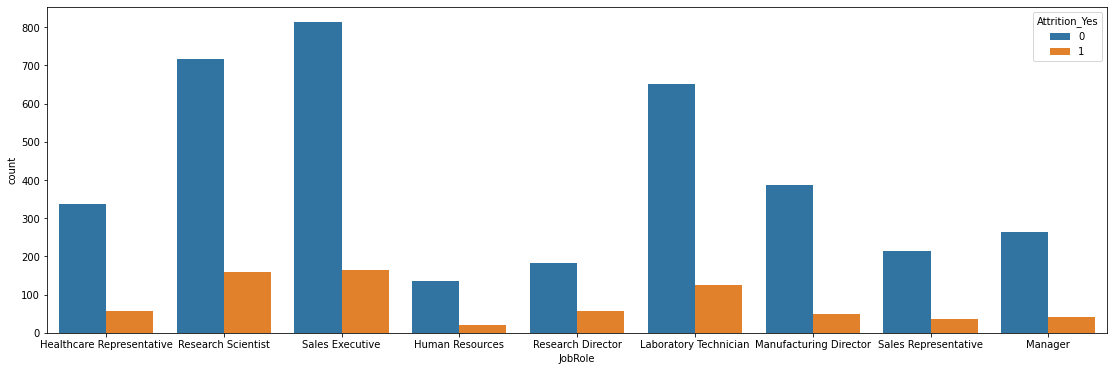

In [ ]:
a4_dims = (19, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = 'JobRole', data = dataset, hue = 'Attrition_Yes', ax=ax)

In [ ]:
#Resign Ratios by Job Role

HR dept. employees are really low paid related to others. This can be an important reason for job quits from the human resources department.